[00:18:29] Molecule does not have explicit Hs. Consider calling AddHs()
[00:18:29] Molecule does not have explicit Hs. Consider calling AddHs()


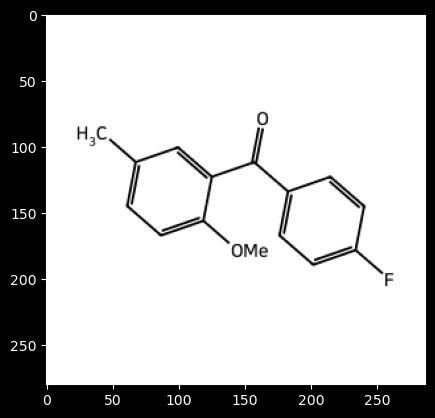

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from src.generate_detection_data import Smiles2Img, corner2center, center2corner

smile = "COc1ccc(C)cc1C(=O)c1ccc(F)cc1"
img = Smiles2Img(smile, 256)
plt.imshow(img)

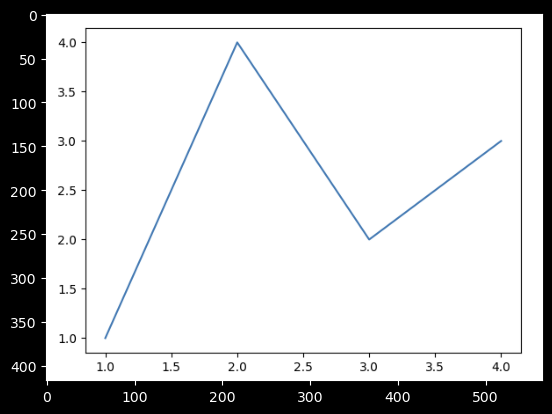

In [3]:
from PIL import Image
img = Image.open("./dataset/sample_img/image_00001.png", mode = 'r')
img = img.convert('RGB')
plt.imshow(img)

img : 590 x 1134


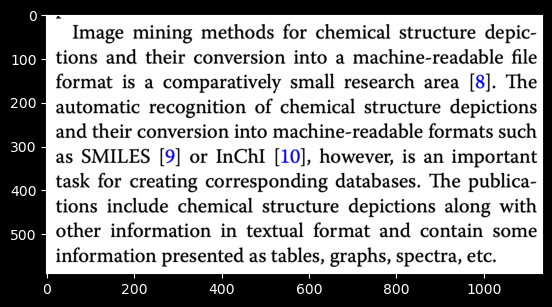

In [9]:
from PIL import Image
img = Image.open("./dataset/sample_text/image_00001.png", mode = 'r')
img = img.convert('RGB')
plt.imshow(img)
print("img : {} x {}".format(img.height, img.width))

img : 1496 x 1148


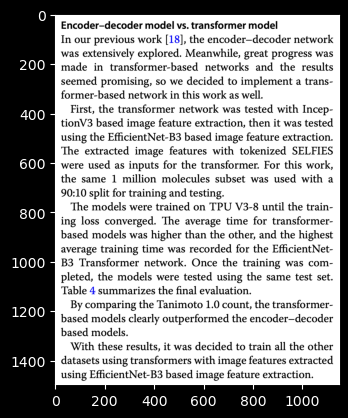

In [11]:
from PIL import Image
img = Image.open("./dataset/sample_text/image_00004.png", mode = 'r')
img = img.convert('RGB')
plt.imshow(img)
print("img : {} x {}".format(img.height, img.width))

In [12]:
import os
import glob2

path_list = glob2.glob("./dataset/sample_img/*")

for path in path_list:
    img = Image.open(path, mode = 'r')
    img = img.convert('RGB')
    print("|height : {} | width : {}".format(img.height, img.width))

|height : 219 | width : 411
|height : 460 | width : 613
|height : 417 | width : 565
|height : 283 | width : 565
|height : 327 | width : 613
|height : 271 | width : 468
|height : 271 | width : 521
|height : 414 | width : 500
|height : 357 | width : 755
|height : 493 | width : 658
|height : 459 | width : 500


In [13]:
path_list = glob2.glob("./dataset/sample_text/*")

for path in path_list:
    img = Image.open(path, mode = 'r')
    img = img.convert('RGB')
    print("|height : {} | width : {}".format(img.height, img.width))

|height : 952 | width : 2128
|height : 1500 | width : 2324
|height : 590 | width : 1134
|height : 854 | width : 2318
|height : 1120 | width : 2024
|height : 590 | width : 2318
|height : 1496 | width : 1148
|height : 1014 | width : 2128
|height : 856 | width : 2128


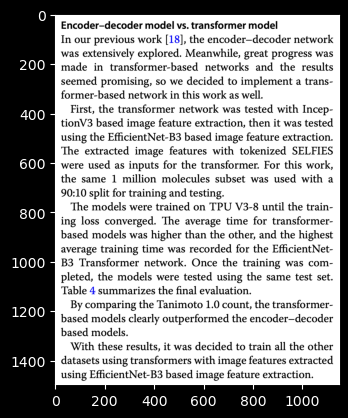

In [33]:
img = Image.open(path_list[-3], mode = 'r')
img = img.convert('RGB')
plt.imshow(img)

img :  (952, 2128, 3)


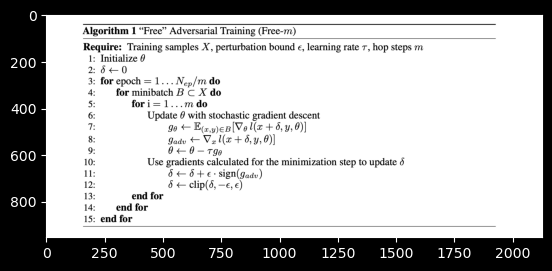

In [31]:
img = cv2.imread(path_list[0])
plt.imshow(img)
print("img : ", img.shape)


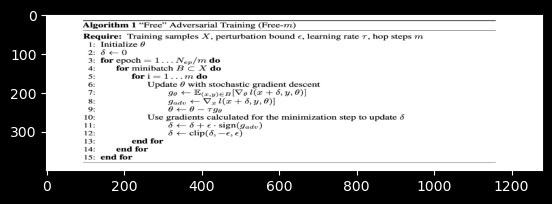

In [30]:
img_=cv2.resize(img, (1280, 400))
plt.imshow(img_)

In [35]:
import random
random.sample([1,2,3,4,5], 2)

[2, 1]

In [21]:
smile01 = "Nc1ccc(N2CCC(O)C2)nc1N1CCCC1"
smile02 = "COc1ccc(C(Nc2ccc(C#N)c(F)c2)c2nn(-c3ccccc3C(=O)O)c(=O)[nH]2)cc1OC"
smile03 = "CC(=O)CCCCC(=O)C1CCC2CCCCC2C1"
smile04 = "O=C(C=Cc1cccc(S(=O)(=O)N2CCN(c3ccccc3F)CC2)c1)NO"
smile_list = [smile01, smile02, smile03, smile04]

In [22]:
img_list = []
pos_list = []

for smile in smile_list:
    img = Smiles2Img(smile, 256)
    img_list.append(img)
    pos_list.append((img.shape[1],img.shape[0]))

[01:41:20] Molecule does not have explicit Hs. Consider calling AddHs()
[01:41:20] Molecule does not have explicit Hs. Consider calling AddHs()
[01:41:20] Molecule does not have explicit Hs. Consider calling AddHs()
[01:41:20] Molecule does not have explicit Hs. Consider calling AddHs()
[01:41:20] Molecule does not have explicit Hs. Consider calling AddHs()
[01:41:20] Molecule does not have explicit Hs. Consider calling AddHs()


In [23]:
img_list[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [24]:
import cv2
import numpy as np

def generate_integrated_image(images, image_info, max_height : int = 512, max_width : int = 512):
  
    # Create an empty canvas for the integrated image
    integrated_image = np.ones((max_height, max_width, 3), dtype=np.uint8) * 255

    # Create a mask to keep track of filled regions on the integrated image
    filled_mask = np.zeros((max_height, max_width), dtype=np.uint8)

    for image, info in zip(images, image_info):
        image_id = info['image_id']
        height = info['height']
        width = info['width']
        x = info['x']
        y = info['y']
        
        # Resize the image to its height and width specified in COCO format
        image = cv2.resize(image, (width, height))

        # Check if the current region on the integrated image is already filled
        region_mask = filled_mask[y:y+height, x:x+width]
        
        if np.any(region_mask):
            new_x, new_y = find_non_overlapping_position(filled_mask, height, width)
            x = new_x
            y = new_y
            
            print("new_x : {}, new_y : {}".format(x,y))

        # Place the resized image onto the integrated image at the specified coordinates
        print(image.shape)
        print(integrated_image.shape)
        print(integrated_image[y:y+height, x:x+width].shape)
        
        integrated_image[y:y+height, x:x+width] = image

        # Update the filled mask with the filled region
        filled_mask[y:y+height, x:x+width] = 1

    return integrated_image

def find_non_overlapping_position(mask, height, width):
    # Pad the mask to avoid boundary cases
    mask_padded = np.pad(mask, ((height, height), (width, width)), mode='constant', constant_values=1)

    # Find the first non-filled region on the mask
    y, x = np.unravel_index(np.argmax(mask_padded == 0), mask_padded.shape)

    return x - width, y - height

# Define image information in COCO format
image_info1 = {'image_id': 1, 'height': 200, 'width': 200, 'x': 100, 'y': 100}
image_info2 = {'image_id': 2, 'height': 300, 'width': 300, 'x': 400, 'y': 200}
image_info3 = {'image_id': 3, 'height': 300, 'width': 300, 'x': 120, 'y': 200}
image_info4 = {'image_id': 4, 'height': 300, 'width': 300, 'x': 200, 'y': 300}

# Generate integrated image
integrated_image = generate_integrated_image(img_list, [image_info1, image_info2, image_info3, image_info4], 1280, 760)

# Save the integrated image
cv2.imwrite('./results/integrated_image.jpg', integrated_image)


(200, 200, 3)
(1280, 760, 3)
(200, 200, 3)
(300, 300, 3)
(1280, 760, 3)
(300, 300, 3)
new_x : 0, new_y : 0
(300, 300, 3)
(1280, 760, 3)
(300, 300, 3)
new_x : 300, new_y : 0
(300, 300, 3)
(1280, 760, 3)
(300, 300, 3)


True

In [25]:
import cv2
import numpy as np

def generate_integrated_image(images, fig_height : int = 512, fig_width : int = 512, max_iters : int = 128):
  
    # Create an empty canvas for the integrated image
    integrated_image = np.ones((fig_height, fig_width, 3), dtype=np.uint8) * 255

    # Create a mask to keep track of filled regions on the integrated image
    filled_mask = np.zeros((fig_height, fig_width), dtype=np.uint8)
    
    # max height and width
    max_height = max([img.shape[0] for img in images])
    max_width = max([img.shape[1] for img in images])
    
    if max_height > fig_height or max_width > fig_width:
        print("error : image size exceed the canvas size")
        return None, None

    x_max = fig_width - max_width
    y_max = fig_height - max_height
    
    end_process = False
    n_process = 0
    max_process = max_iters
    
    n_objects = len(images)
    
    while not end_process:
        
        x_list = np.random.randint(0, x_max, n_objects)
        y_list = np.random.randint(0, y_max, n_objects)
        
        for x,y,img in zip(x_list, y_list, images):
            h = img.shape[0]
            w = img.shape[1]
            filled_mask[y:y+h,x:x+w] += 1
            
        if np.max(filled_mask) < 2:
            end_process = True
        else:
            filled_mask = np.zeros((fig_height, fig_width), dtype=np.uint8)
            
        # iteration+1
        n_process += 1
    
        # condition
        if n_process > max_process:
            break
        
        # end
        if end_process:
            break
    
    if not end_process:
        return None, None
    
    # if random batch is successful
    label = []
    for image, x, y in zip(images, x_list, y_list):
        
        height = image.shape[0]
        width = image.shape[1]
        
        label.append([x,y,x+width,y+height])
        
        # Resize the image to its height and width specified in COCO format
        image = cv2.resize(image, (width, height))
   
        # draw the image into the canvas
        integrated_image[y:y+height, x:x+width] = image
    
    return integrated_image, label

# Generate integrated image
integrated_image, label = generate_integrated_image(img_list, 1280, 760)

# Save the integrated image
if integrated_image is not None:
    cv2.imwrite('./results/integrated_image.jpg', integrated_image)
else:
    print("failed to create image")

In [26]:
test_img = cv2.imread('./results/integrated_image.jpg')
test_img.shape

(1280, 760, 3)

In [27]:
test_img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

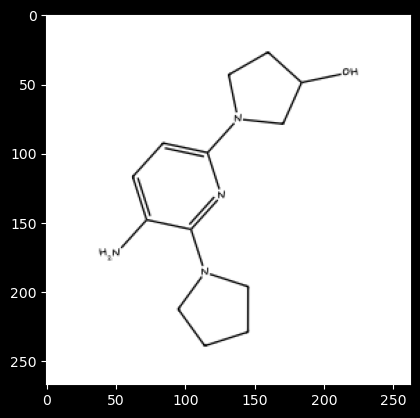

In [54]:
target = label[0]
x1 = target[0]
y1 = target[1]
x2 = target[2]
y2 = target[3]

plt.imshow(integrated_image[y1:y2,x1:x2,:])

In [55]:
df = pd.read_csv('./dataset/surechembl_cleansed.csv').sample(n=10000)

In [56]:
df.head()

,SMILES
5016101,COC1CCOC(c2cccc(COc3cc4oc(=O)cc(C)c4cc3Cl)c2)C1
17358645,CSc1cc(C)ccc1C(O)c1ccccc1
6454163,C=CC(=O)OCCOC(CC)[Si](C)(C)O[Si](C)(C)O[Si](C)...
14370475,Cc1ccccc1N(c1ccc2cc3c4cc(-c5ccccc5)cc5c6cc7ccc...
9468552,CNC1Cc2ccccc2C(C)(C)N(Cc2ccccc2)C1=O


In [1]:
import pandas as pd
df = pd.read_csv("./dataset/detection_data.csv")
df.head()

,Unnamed: 0,id,SMILES,img,n_molecules,label
0,0,0,['CC(C)(C)c1cc(C(C)(C)C)c(-n2cc(C(N)=O)c(=O)c3...,./dataset/detection/img_00000.jpg,1,"[[16, 901, 243, 1136]]"
1,1,1,['CCN(C)c1ccc2c(c1)Oc1cc(N(CC)CC)ccc1C2c1ccc(C...,./dataset/detection/img_00001.jpg,1,"[[485, 503, 710, 726]]"
2,2,2,['CCCc1nc(C)n(-c2ccc3c(c2)CC(C)(C)O3)c(=O)c1Cc...,./dataset/detection/img_00002.jpg,1,"[[181, 232, 427, 492]]"
3,3,3,['CCC(O)CNC(CSSCC(N)C(=O)O)C(=O)O'],./dataset/detection/img_00003.jpg,1,"[[68, 1024, 301, 1244]]"
4,4,4,['CCOC(=O)C(C)(C)c1cccc(CONC(=O)[C@@H]2c3ccccc...,./dataset/detection/img_00004.jpg,1,"[[291, 479, 492, 693]]"


In [16]:
import torch
import ast
a = ast.literal_eval(df['label'][10000])